In [166]:
import sys
import gym
import numpy as np
from collections import defaultdict
from tqdm import tqdm

In [149]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable



def plot_blackjack_values(V):



    def get_Z(x, y, usable_ace):

        if (x,y,usable_ace) in V:

            return V[x,y,usable_ace]

        else:

            return 0



    def get_figure(usable_ace, ax):

        x_range = np.arange(11, 22)

        y_range = np.arange(1, 11)

        X, Y = np.meshgrid(x_range, y_range)

        

        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)



        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)

        ax.set_xlabel('Player\'s Current Sum')

        ax.set_ylabel('Dealer\'s Showing Card')

        ax.set_zlabel('State Value')

        ax.view_init(ax.elev, -120)



    fig = plt.figure(figsize=(20, 20))

    ax = fig.add_subplot(211, projection='3d')

    ax.set_title('Usable Ace')

    get_figure(True, ax)

    ax = fig.add_subplot(212, projection='3d')

    ax.set_title('No Usable Ace')

    get_figure(False, ax)

    plt.show()



def plot_policy(policy):



    def get_Z(x, y, usable_ace):

        if (x,y,usable_ace) in policy:

            return policy[x,y,usable_ace]

        else:

            return 1



    def get_figure(usable_ace, ax):

        x_range = np.arange(11, 22)

        y_range = np.arange(10, 0, -1)

        X, Y = np.meshgrid(x_range, y_range)

        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])

        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])

        plt.xticks(x_range)

        plt.yticks(y_range)

        plt.gca().invert_yaxis()

        ax.set_xlabel('Player\'s Current Sum')

        ax.set_ylabel('Dealer\'s Showing Card')

        ax.grid(color='w', linestyle='-', linewidth=1)

        divider = make_axes_locatable(ax)

        cax = divider.append_axes("right", size="5%", pad=0.1)

        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)

        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])

            

    fig = plt.figure(figsize=(15, 15))

    ax = fig.add_subplot(121)

    ax.set_title('Usable Ace')

    get_figure(True, ax)

    ax = fig.add_subplot(122)

    ax.set_title('No Usable Ace')

    get_figure(False, ax)

    plt.show()

In [3]:
env = gym.make('Blackjack-v0')

In [4]:
env.action_space

Discrete(2)

In [5]:
env.dealer

[7, 10]

In [6]:
for i_episode in range(10):
    state = env.reset()
    while True:
        print(f"Players hand:{state[0]}, Dealer's hand:{state[1]}, Usable Ace:{state[-1]}")
        action = env.action_space.sample() #random
        if action==1:
            print("Hit")
        else:
            print("Stand")
        state, reward, done, info = env.step(action)
        if done:
            print('End game! Reward: ', reward)
            print(f"Players hand:{state[0]}, Dealer's hand:{sum(env.dealer)}")
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            print("-"*70)
            break

Players hand:16, Dealer's hand:2, Usable Ace:False
Stand
End game! Reward:  -1.0
Players hand:16, Dealer's hand:17
You lost :(

----------------------------------------------------------------------
Players hand:20, Dealer's hand:10, Usable Ace:False
Stand
End game! Reward:  0.0
Players hand:20, Dealer's hand:20
You lost :(

----------------------------------------------------------------------
Players hand:17, Dealer's hand:7, Usable Ace:False
Hit
End game! Reward:  -1
Players hand:23, Dealer's hand:17
You lost :(

----------------------------------------------------------------------
Players hand:18, Dealer's hand:6, Usable Ace:False
Stand
End game! Reward:  -1.0
Players hand:18, Dealer's hand:21
You lost :(

----------------------------------------------------------------------
Players hand:16, Dealer's hand:1, Usable Ace:False
Hit
End game! Reward:  -1
Players hand:26, Dealer's hand:10
You lost :(

----------------------------------------------------------------------
Players hand:

In [131]:
def policy_1(env, policy_map=0):
    episode = []
    state = env.reset()
    while True:
        if state[0] > 17:
            p = [0.8,0.2]
        else:
            p = [0.2,0.8]
        action = np.random.choice([0,1], p=p)
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    if policy_map == 1:
        return P
    return episode

In [8]:
def evaluate_avg_reward(policy, num=10000):
    avg_reward = 0
    
    for i in range(num):
        #print(f'initial state: {generate_episode_1(env)[0][0]}, rewards: {generate_episode_1(env)[-1][-1]}')
        avg_reward += policy(env)[-1][-1]
        
    return avg_reward/num

In [9]:
def policy_2(env):
    episode = []
    state = env.reset()
    while True:
        if state[0] < 16 and (state[1] > 7 or state[1] < 2) and state[-1] == False:
            p = [0.1, 0.9]
        elif state[0] < 18 and state[-1] == True:
            p = [0.1, 0.9]
        else:
            p = [0.9,0.1]
        action = np.random.choice([0,1], p=p)
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [144]:
def stochastic_policy_map(policy, num=50000):
    avg_reward = 0
    P = defaultdict(lambda:0)
    for i in range(num):
    #print(f'initial state: {generate_episode_1(env)[0][0]}, rewards: {generate_episode_1(env)[-1][-1]}')
        for _ in policy(env):
            P[_[0]] = _[1]

    return P

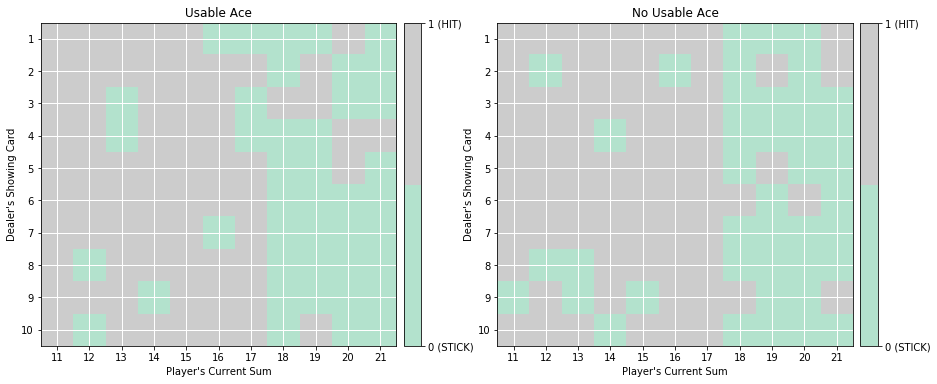

In [145]:
plot_policy(stochastic_policy_map(policy_1))

In [147]:
evaluate_avg_reward(policy=policy_1) 

-0.2651

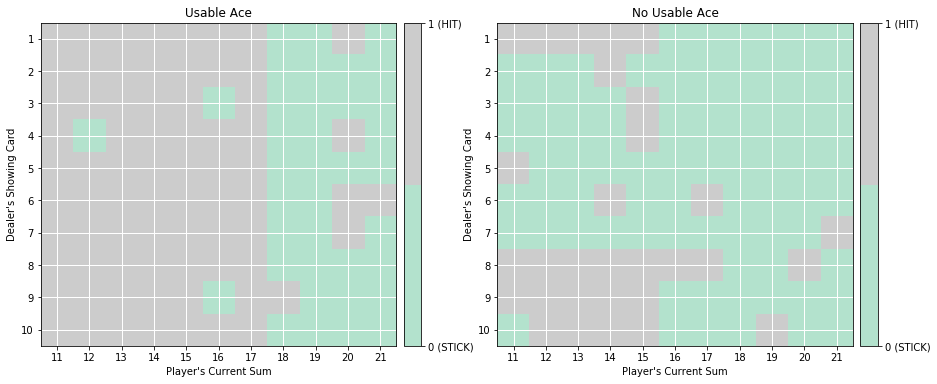

In [148]:
plot_policy(stochastic_policy_map(policy_2))

In [140]:
evaluate_avg_reward(policy=policy_2)

-0.1414

In [134]:
policy_1(env)

[((12, 10, False), 1, 0), ((18, 10, False), 0, -1.0)]

In [12]:
returns_sum = defaultdict(lambda:0)

In [13]:
Q = defaultdict(lambda: np.zeros(env.action_space.n));Q

defaultdict(<function __main__.<lambda>()>, {})

In [24]:
def mc_prediction_q(env, num_episodes, policy, gamma=1.0):
  
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))


    for i_episode in  tqdm(range(1, num_episodes+1)):
        
        episode = policy(env)
        states, actions, rewards = zip(*episode)
        discounts = np.array([gamma**i for i in range(len(rewards)+1)])
        
        for i, state in enumerate(states):
            returns_sum[state][actions[i]] += sum(rewards[i:]*discounts[:-(1+i)])
            N[state][actions[i]] += 1.0
            Q[state][actions[i]] = returns_sum[state][actions[i]] / N[state][actions[i]]
    return Q

In [110]:
def mc_prediction_v(env, num_episodes, policy, gamma=0.9):
  
    returns_sum = defaultdict(lambda: 0)
    N = defaultdict(lambda: 0)
    V = defaultdict(lambda: 0)


    for i_episode in  tqdm(range(1, num_episodes+1)):
        
         episode = policy(env)
        states, actions, rewards = zip(*episode)
        discounts = np.array([gamma**i for i in range(1,len(rewards)+1)])
        #print(discounts, rewards)
        
        returns_sum[states[0]] = sum(rewards*discounts)
        if returns_sum[states[0]] > 1:
            print(discounts, rewards, returns_sum, states[0])
            raise Exception("return can't be greater than 1")
        N[states[0]] += 1.0
        V[states[0]] += (returns_sum[states[0]] - V[states[0]]) / N[states[0]]
    return V

In [167]:
def td_prediction_v(env, num_episodes, policy, gamma=0.9, alpha=0.2):
  
    returns_sum = defaultdict(lambda: 0)
    N = defaultdict(lambda: 0)
    V = defaultdict(lambda: 0)


    for i_episode in tqdm(range(1, num_episodes+1)):

        episode = policy(env)
        states, actions, rewards = zip(*episode)
        discounts = np.array([gamma**i for i in range(1,len(rewards)+1)])
        #print(discounts, rewards)
        
        returns_sum[states[0]] = sum(rewards*discounts)
        if len(states)>1:
            V[states[0]] += ( rewards[0] + gamma*V[states[1]] - V[states[0]])*alpha
        else:
            V[states[0]] += ( rewards[0] - V[states[0]])*alpha
    return V

In [168]:
v_1_td = td_prediction_v(env, 500000, policy_1)

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:30<00:00, 16284.14it/s]


In [169]:
v_1_td

defaultdict(<function __main__.td_prediction_v.<locals>.<lambda>()>,
            {(16, 8, False): -0.6754872190909005,
             (20, 8, False): 0.9171978645942387,
             (19, 1, True): -0.12090428066126435,
             (19, 1, False): -0.790096753229594,
             (19, 10, False): -0.20475161888202442,
             (15, 8, False): -0.4927082569023577,
             (7, 10, False): -0.45770810017949265,
             (17, 10, False): -0.5903640876633487,
             (20, 10, True): -0.08628965980472096,
             (16, 10, False): -0.7668777282714132,
             (18, 10, False): -0.6209593292792629,
             (14, 7, False): -0.8120814444355814,
             (19, 7, False): 0.14656701099189143,
             (10, 10, False): -0.34868423393164455,
             (20, 10, False): 0.2927663119821714,
             (8, 4, False): -0.3735519349143399,
             (16, 4, False): -0.7029939103844043,
             (21, 8, True): 0.9490937025258616,
             (9, 6, False):

In [116]:
v_1 = mc_prediction_v(env, 50000, policy_1)
v_2 = mc_prediction_v(env, 50000, policy_2)

Episode 5000/50000.
Episode 10000/50000.
Episode 15000/50000.
Episode 20000/50000.
Episode 25000/50000.
Episode 30000/50000.
Episode 35000/50000.
Episode 40000/50000.
Episode 45000/50000.
Episode 50000/50000.
Episode 5000/50000.
Episode 10000/50000.
Episode 15000/50000.
Episode 20000/50000.
Episode 25000/50000.
Episode 30000/50000.
Episode 35000/50000.
Episode 40000/50000.
Episode 45000/50000.
Episode 50000/50000.


In [113]:
v_1

defaultdict(<function __main__.mc_prediction_v.<locals>.<lambda>()>,
            {(19, 2, False): 0.09154143646408838,
             (12, 3, False): -0.37549297546012284,
             (6, 6, False): -0.2291961038961039,
             (9, 10, False): -0.3354754485049831,
             (15, 2, False): -0.4678651685393261,
             (12, 5, False): -0.292407163323782,
             (18, 10, False): -0.2484172661870503,
             (13, 10, False): -0.5114212556732228,
             (13, 6, False): -0.33022050473186126,
             (12, 1, False): -0.5623623529411765,
             (17, 10, False): -0.5565309917355368,
             (17, 1, False): -0.6559961538461538,
             (20, 10, False): 0.12908536585365848,
             (12, 9, False): -0.3649486322188449,
             (11, 10, False): -0.20353165087956676,
             (14, 6, False): -0.37526732673267293,
             (16, 10, False): -0.5604504048582989,
             (15, 5, False): -0.3563018181818182,
             (19, 5, Tr

In [25]:
q_1 = mc_prediction_q(env, 10000, policy_1)
q_2 = mc_prediction_q(env, 10000, policy_2)

Episode 1000/10000.
(-1,)
((15, 10, False),)
Episode 2000/10000.
(0, 1.0)
((21, 10, True), (21, 10, False))
Episode 3000/10000.
(0.0,)
((19, 3, False),)
Episode 4000/10000.
(0, 0, 1.0)
((6, 10, False), (9, 10, False), (19, 10, False))
Episode 5000/10000.
(0, -1.0)
((6, 7, False), (9, 7, False))
Episode 6000/10000.
(0, 1.0)
((8, 3, False), (18, 3, False))
Episode 7000/10000.
(-1.0,)
((13, 3, False),)
Episode 8000/10000.
(0, -1.0)
((14, 10, False), (18, 10, False))
Episode 9000/10000.
(0, -1)
((12, 10, False), (14, 10, False))
Episode 10000/10000.
(1.0,)
((20, 8, False),)
Episode 1000/10000.
(1.0,)
((20, 10, False),)
Episode 2000/10000.
(-1,)
((15, 10, False),)
Episode 3000/10000.
(-1.0,)
((9, 2, False),)
Episode 4000/10000.
(-1,)
((12, 10, False),)
Episode 5000/10000.
(-1.0,)
((14, 5, False),)
Episode 6000/10000.
(-1,)
((13, 1, False),)
Episode 7000/10000.
(-1.0,)
((12, 10, False),)
Episode 8000/10000.
(1.0,)
((21, 10, True),)
Episode 9000/10000.
(1.0,)
((20, 6, False),)
Episode 10000/1

In [17]:
q_2

defaultdict(<function __main__.mc_prediction_q.<locals>.<lambda>()>,
            {(17, 4, False): array([-0.11111111, -1.        ]),
             (15, 6, False): array([-0.14705882, -1.        ]),
             (20, 3, False): array([ 0.50819672, -1.        ]),
             (13, 6, True): array([ 0.        , -0.33333333]),
             (20, 6, True): array([ 0.66666667, -1.        ]),
             (20, 2, True): array([ 0.4, -1. ]),
             (19, 2, False): array([ 0.43478261, -1.        ]),
             (9, 6, False): array([-0.18518519,  0.5       ]),
             (16, 6, False): array([-0.30232558, -1.        ]),
             (11, 10, False): array([-0.31034483, -0.03208556]),
             (12, 5, False): array([-0.39240506, -0.4       ]),
             (13, 9, False): array([-1.        , -0.52631579]),
             (14, 9, False): array([-0.55555556, -0.48863636]),
             (10, 8, False): array([-1.        , -0.13793103]),
             (17, 10, False): array([-0.38235294, -0

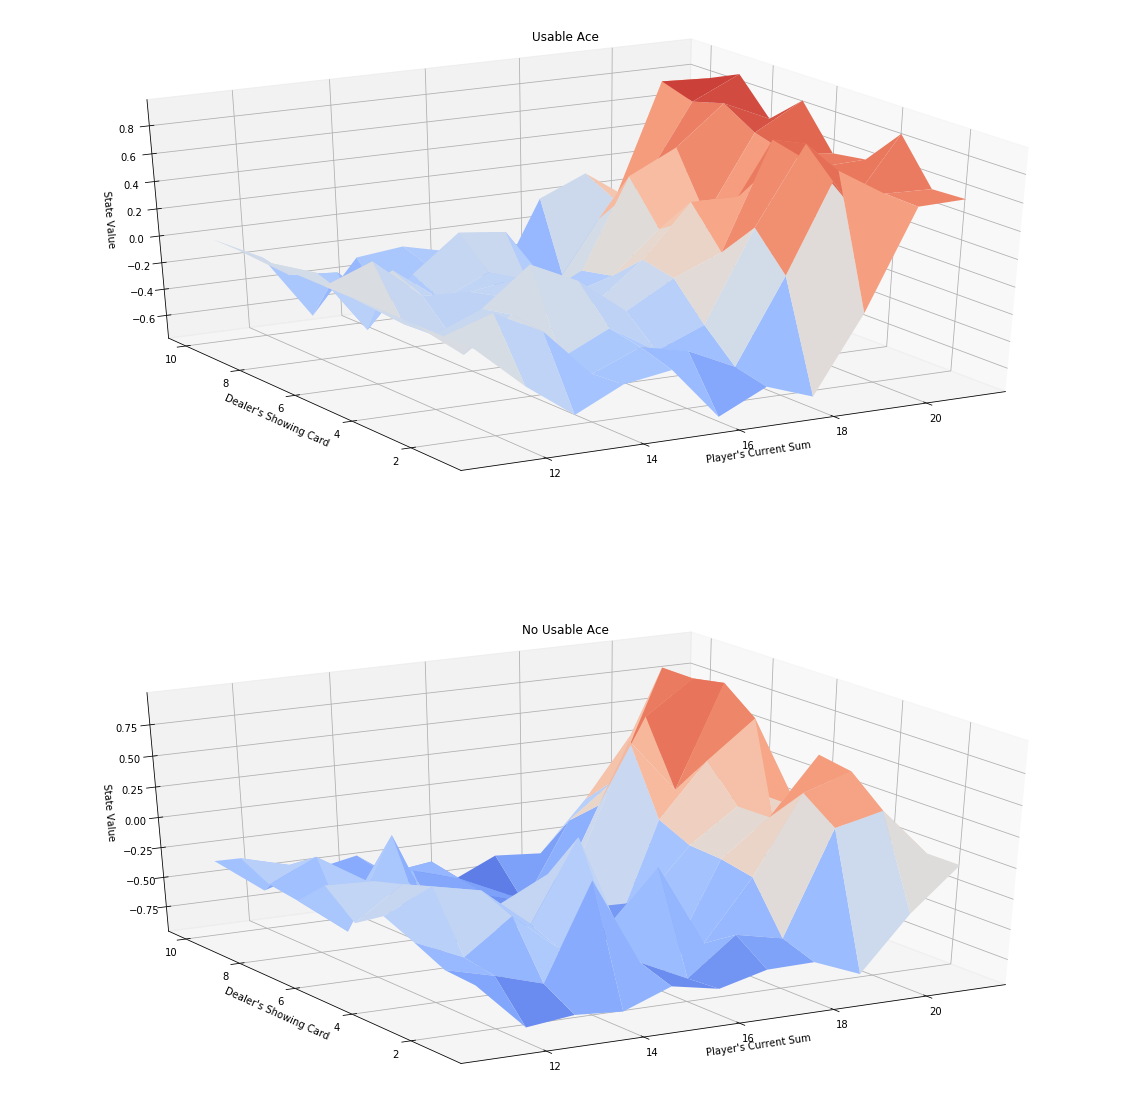

In [170]:
plot_blackjack_values(v_1_td)

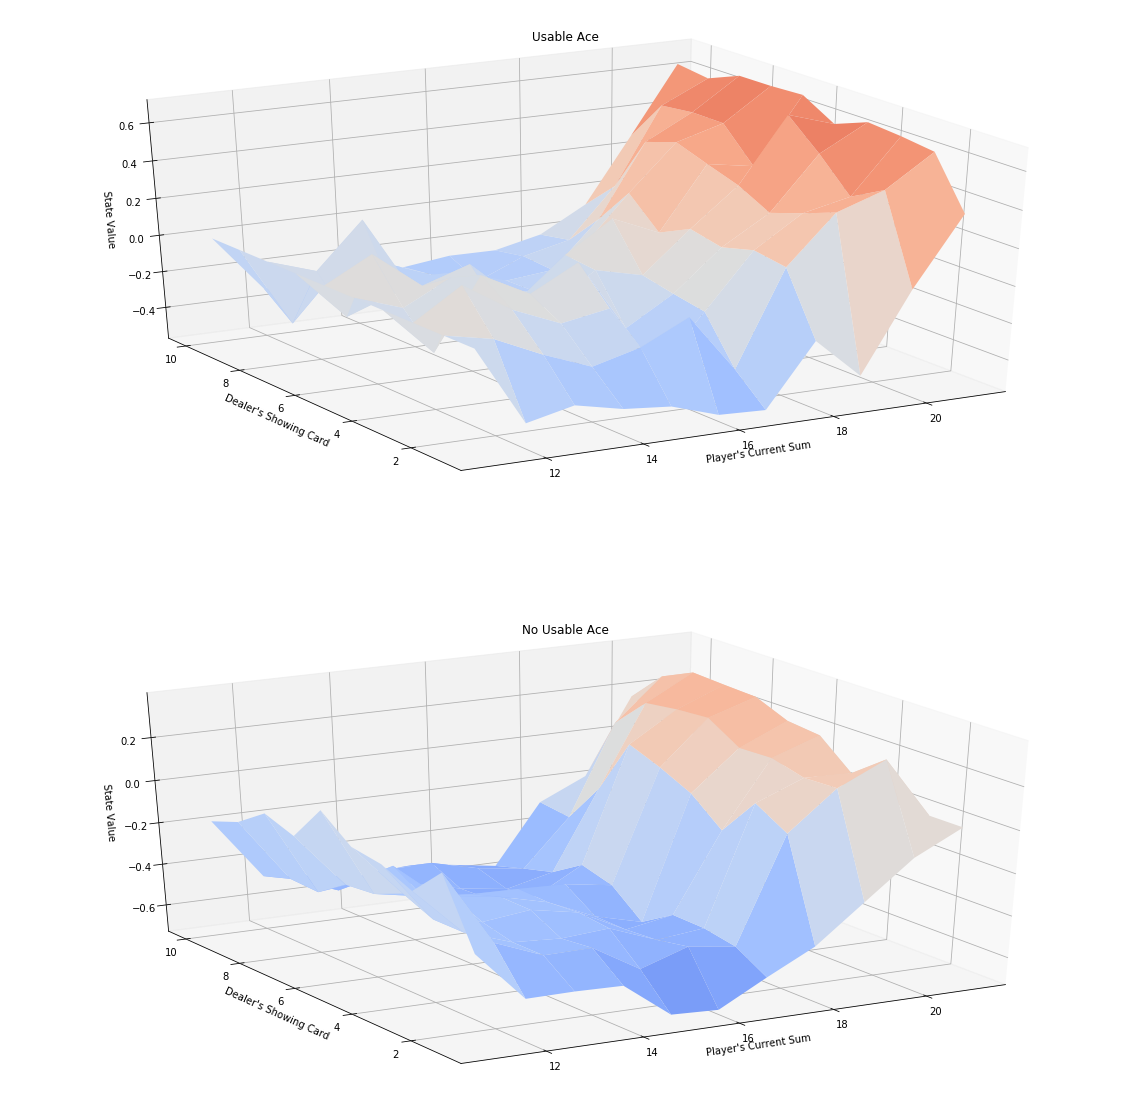

In [117]:
plot_blackjack_values(v_1)

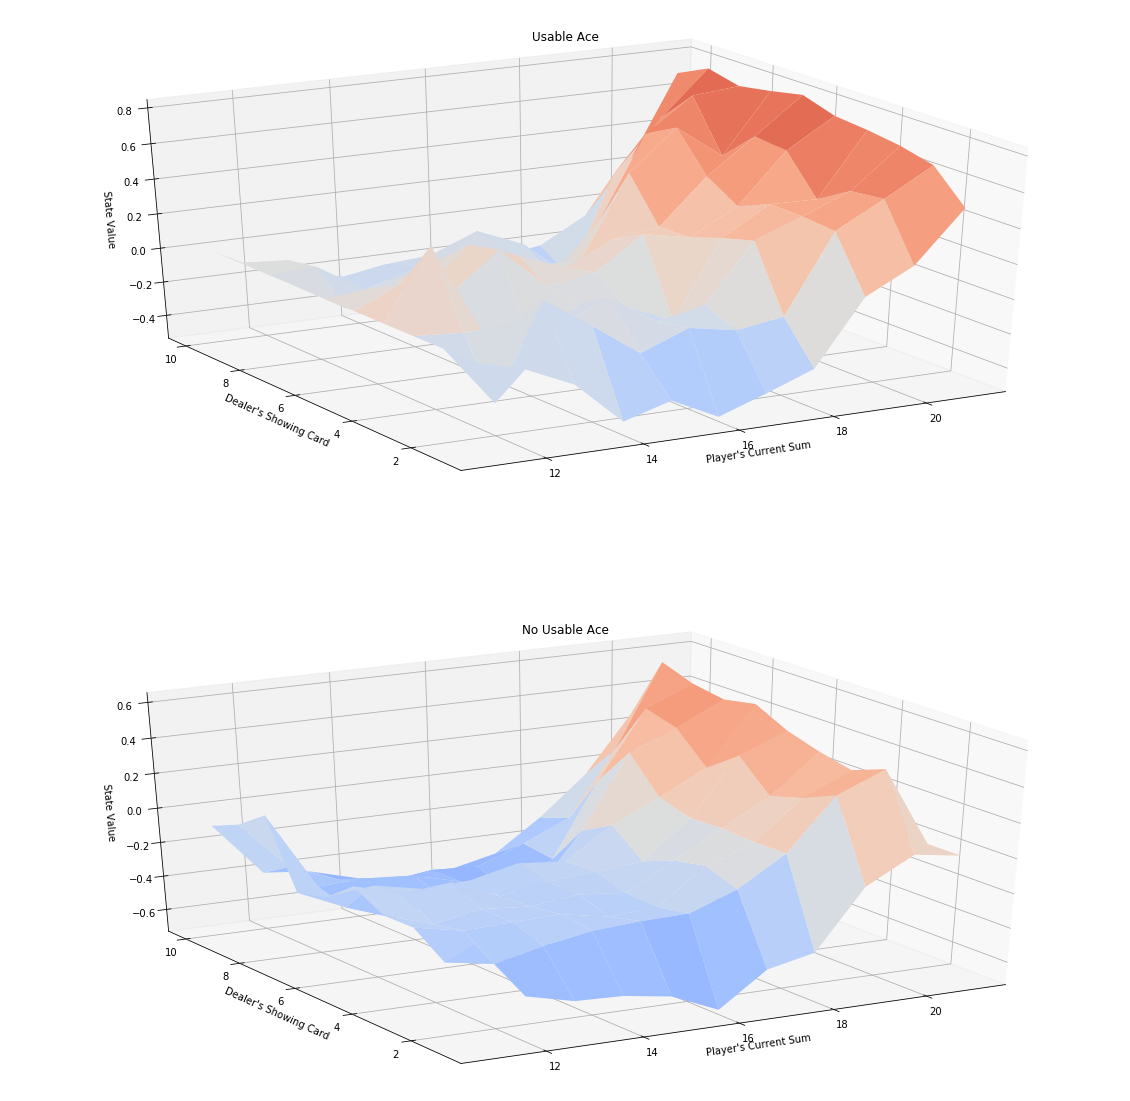

In [119]:
plot_blackjack_values(v_2)

In [120]:

def generate_episode_from_Q(env, Q, epsilon, nA):
    """ generates an episode from following the epsilon-greedy policy """
    episode = []
    state = env.reset()
    while True:
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) \
                                    if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

def get_probs(Q_s, epsilon, nA):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

def update_Q(env, episode, Q, alpha, gamma):
    """ updates the action-value function estimate using the most recent episode """
    states, actions, rewards = zip(*episode)
    # prepare for discounting
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]] 
        Q[state][actions[i]] = old_Q + alpha*(sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)
    return Q

In [121]:

def mc_control(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99999, eps_min=0.05):
    nA = env.action_space.n
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # set the value of epsilon
        epsilon = max(epsilon*eps_decay, eps_min)
        # generate an episode by following epsilon-greedy policy
        episode = generate_episode_from_Q(env, Q, epsilon, nA)
        # update the action-value function estimate using the episode
        Q = update_Q(env, episode, Q, alpha, gamma)
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    return policy, Q

In [122]:
policy, Q = mc_control(env, 500000, 0.02)

Episode 500000/500000.

In [123]:
policy

{(15, 5, False): 0,
 (12, 9, True): 1,
 (13, 9, True): 1,
 (14, 9, True): 1,
 (16, 5, False): 0,
 (19, 8, False): 0,
 (11, 1, False): 1,
 (17, 7, False): 0,
 (20, 7, False): 0,
 (21, 7, False): 0,
 (17, 10, False): 0,
 (18, 10, False): 0,
 (13, 2, False): 1,
 (14, 10, False): 1,
 (10, 10, False): 1,
 (15, 10, False): 1,
 (15, 4, False): 0,
 (18, 4, False): 0,
 (21, 4, False): 0,
 (13, 6, False): 1,
 (18, 6, False): 0,
 (19, 2, False): 0,
 (21, 1, True): 0,
 (17, 1, False): 0,
 (13, 8, False): 1,
 (19, 10, True): 0,
 (12, 10, False): 1,
 (20, 10, False): 0,
 (6, 4, False): 1,
 (14, 1, False): 1,
 (18, 1, False): 0,
 (20, 4, False): 0,
 (12, 8, False): 1,
 (8, 10, False): 1,
 (20, 6, False): 0,
 (18, 8, True): 0,
 (10, 6, False): 1,
 (19, 10, False): 0,
 (4, 7, False): 1,
 (19, 6, False): 0,
 (13, 10, False): 1,
 (17, 10, True): 1,
 (20, 4, True): 0,
 (21, 9, True): 0,
 (12, 9, False): 1,
 (11, 10, False): 1,
 (19, 5, False): 0,
 (19, 9, False): 0,
 (12, 2, False): 0,
 (21, 2, False): 0,

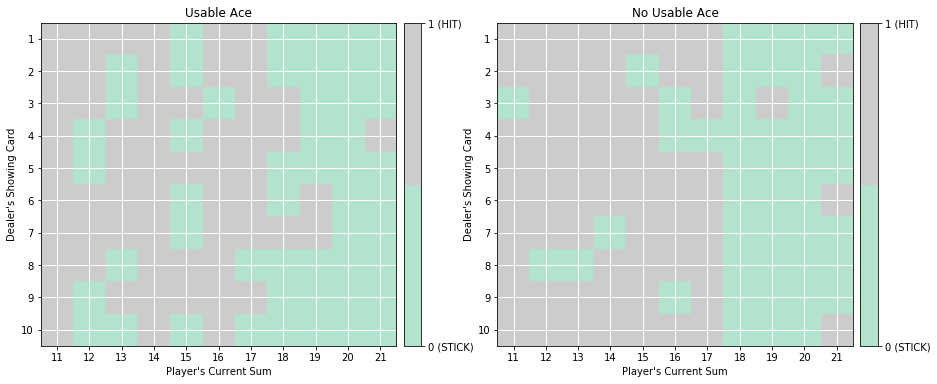

In [138]:
plot_policy(policy_map(policy_1))